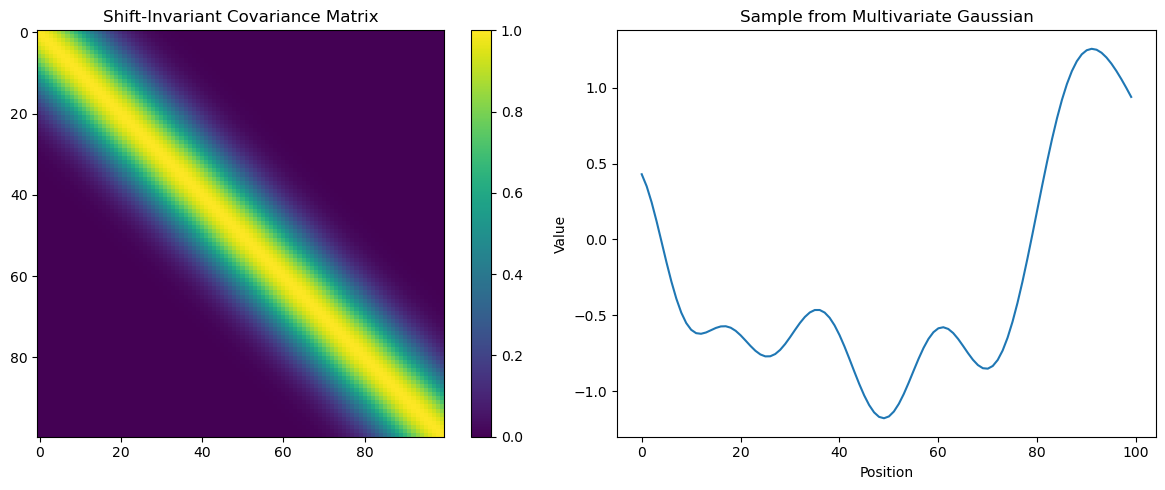

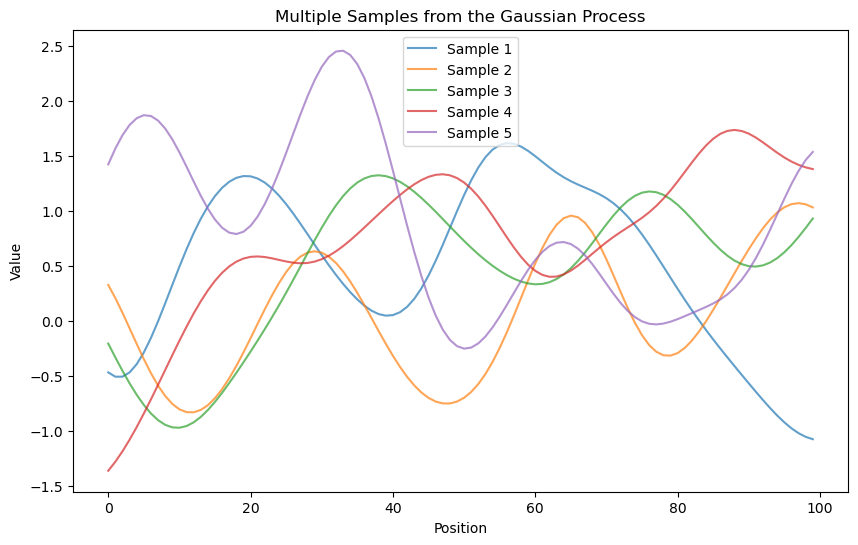

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Define parameters for the shift-invariant covariance matrix
n = 100  # Size of the grid
sigma = 1.0  # Standard deviation
length_scale = 10.0  # Correlation length scale

# Create a distance matrix
x = np.arange(n)
distances = np.abs(x[:, np.newaxis] - x[np.newaxis, :])

# Create a shift-invariant covariance matrix using squared exponential kernel
cov_matrix = sigma**2 * np.exp(-(distances**2) / (2 * length_scale**2))

# Ensure the covariance matrix is symmetric and positive definite
cov_matrix = 0.5 * (cov_matrix + cov_matrix.T)
cov_matrix += 1e-10 * np.eye(n)  # Add small diagonal term for numerical stability

# Sample from the multivariate Gaussian distribution
L = linalg.cholesky(cov_matrix, lower=True)
z = np.random.normal(size=n)
samples = np.dot(L, z)

# Plot the covariance matrix
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(cov_matrix, cmap='viridis')
plt.colorbar()
plt.title('Shift-Invariant Covariance Matrix')

# Plot a sample from the Gaussian process
plt.subplot(122)
plt.plot(samples)
plt.title('Sample from Multivariate Gaussian')
plt.xlabel('Position')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Generate multiple samples
num_samples = 5
samples_matrix = np.zeros((num_samples, n))
for i in range(num_samples):
    z = np.random.normal(size=n)
    samples_matrix[i] = np.dot(L, z)

# Plot multiple samples
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(samples_matrix[i], alpha=0.7, label=f'Sample {i+1}')
plt.title('Multiple Samples from the Gaussian Process')
plt.xlabel('Position')
plt.ylabel('Value')
plt.legend()
plt.show()
